In [1]:
####### Imports #######
# Directory and file paths processing
# Image processing into 3D arrays
import re
import os
import sys
sys.path.append('/home/pfa/Documents/Code')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from sort import sort_nicely
from multiprocessing import Process, Manager
import pickle

Using TensorFlow backend.


In [3]:
## Get dataset
base_dir = '/home/datasets/GAIT-IT'

sample_count = 0
all_images = []
all_labels = []
subjects_data = {}
train_images = []; train_labels = []
validation_images = []; validation_labels = []
test_images = []; test_labels = []

classes = {'Diplegic' : 0, 'Hemiplegic' : 1, 'Neuropathic' : 2, 'Normal' : 3, 'Parkinson' : 4}
classes_inv = {0 : 'Diplegic', 1 : 'Hemiplegic', 2 : 'Neuropathic', 3 : 'Normal', 4 : 'Parkinson'}

In [4]:
## Train GEIs directories

# Sort pathologies, OCD purposes only
pathologies = list(classes.keys())
sort_nicely(pathologies)
for pathology in pathologies:

    pathology_dir = base_dir + '/{}'.format(pathology)
    print(pathology_dir)
    pathology_subj_folders = [name for name in os.listdir(pathology_dir) if os.path.isdir(os.path.join(pathology_dir, name))]
    sort_nicely(pathology_subj_folders)
    
    # /Pathology/subj{i}/GEIs/subj_{i}-pat_{j}-lvl_{k}-{l}_{direction}
    sub_count = 0
    for subj_folder in pathology_subj_folders:

        if subj_folder in ['s13', 's21']:
            continue

        sub_count += 1
        subj_folder_dir = os.path.join(pathology_dir, subj_folder)
        # print(subj_folder_dir)
        subj_GEIs_dir = os.path.join(subj_folder_dir, 'SEIs', 'side_view')
        # print(subj_GEIs_dir)

        subj_GEIs_folders = [name for name in os.listdir(subj_GEIs_dir) if os.path.isdir(os.path.join(subj_GEIs_dir, name))]
        sort_nicely(subj_GEIs_folders)

        if 's{}'.format(sub_count) not in subjects_data: subjects_data['s{}'.format(sub_count)] = {}
        subjects_data['s{}'.format(sub_count)][pathology] = {}
        subjects_data['s{}'.format(sub_count)][pathology]["images"] = []
        subjects_data['s{}'.format(sub_count)][pathology]["labels"] = []

        for folder in subj_GEIs_folders:
            # Directory with the GEI images
            subj_pat_lvl_dir = os.path.join(subj_GEIs_dir, folder)
            # print(subj_pat_lvl_dir)
            file_names = os.listdir(subj_pat_lvl_dir)
            sort_nicely(file_names)
            # print(file_names)
            
            # Convert images to numpy arrays, put in batches
            for file_name in file_names:
                file_path = os.path.join(subj_pat_lvl_dir, file_name)
                img = image.load_img(file_path, target_size=(224, 224))
                img_tensor = image.img_to_array(img)
                sample_count += 1
                #all_images.append(img_tensor)
                #all_labels.append(classes[pathology])

                subjects_data['s{}'.format(sub_count)][pathology]["images"].append(img_tensor)
                subjects_data['s{}'.format(sub_count)][pathology]["labels"].append(classes[pathology])

/home/datasets/GAIT-IT/Diplegic
/home/datasets/GAIT-IT/Hemiplegic
/home/datasets/GAIT-IT/Neuropathic
/home/datasets/GAIT-IT/Normal
/home/datasets/GAIT-IT/Parkinson


In [5]:
## Get dataset
base_dir = '/home/datasets/GAIT-IST'

classes = {'diplegic' : 0, 'hemiplegic' : 1, 'neuropathic' : 2, 'normal' : 3, 'parkinsonian' : 4}
classes_inv = {0 : 'diplegic', 1 : 'hemiplegic', 2 : 'neuropathic', 3 : 'normal', 4 : 'parkinsonian'}

In [6]:
## Train GEIs directories

# Sort pathologies, OCD purposes only
pathologies = list(classes.keys())
sort_nicely(pathologies)
for pathology in pathologies:

    pathology_dir = base_dir + '/{}'.format(pathology)
    print(pathology_dir)
    pathology_subj_folders = [name for name in os.listdir(pathology_dir) if os.path.isdir(os.path.join(pathology_dir, name))]
    sort_nicely(pathology_subj_folders)
    
    # /Pathology/subj{i}/GEIs/subj_{i}-pat_{j}-lvl_{k}-{l}_{direction}
    for subj_folder in pathology_subj_folders:
        subj_folder_dir = os.path.join(pathology_dir, subj_folder)
        # print(subj_folder_dir)
        subj_GEIs_dir = os.path.join(subj_folder_dir, 'SGEIs')
        # print(subj_GEIs_dir)

        subj_GEIs_folders = [name for name in os.listdir(subj_GEIs_dir) if os.path.isdir(os.path.join(subj_GEIs_dir, name))]
        sort_nicely(subj_GEIs_folders)

        if subj_folder not in subjects_data: subjects_data[subj_folder] = {}
        subjects_data[subj_folder][pathology] = {}
        subjects_data[subj_folder][pathology]["images"] = []
        subjects_data[subj_folder][pathology]["labels"] = []

        for folder in subj_GEIs_folders:
            # Directory with the GEI images
            subj_pat_lvl_dir = os.path.join(subj_GEIs_dir, folder)
            # print(subj_pat_lvl_dir)
            file_names = os.listdir(subj_pat_lvl_dir)
            sort_nicely(file_names)
            # print(file_names)
            
            # Convert images to numpy arrays, put in batches
            for file_name in file_names:
                file_path = os.path.join(subj_pat_lvl_dir, file_name)
                img = image.load_img(file_path, target_size=(224, 224))
                img_tensor = image.img_to_array(img)
                sample_count += 1
                #all_images.append(img_tensor)
                #all_labels.append(classes[pathology])

                subjects_data[subj_folder][pathology]["images"].append(img_tensor)
                subjects_data[subj_folder][pathology]["labels"].append(classes[pathology])

/home/datasets/GAIT-IST/diplegic
/home/datasets/GAIT-IST/hemiplegic
/home/datasets/GAIT-IST/neuropathic
/home/datasets/GAIT-IST/normal
/home/datasets/GAIT-IST/parkinsonian


In [7]:
for subject in sorted(subjects_data.keys()):
    print(subject)

s1
s10
s11
s12
s13
s14
s15
s16
s17
s18
s19
s2
s20
s21
s3
s4
s5
s6
s7
s8
s9
sub1
sub10
sub2
sub3
sub4
sub5
sub6
sub7
sub8
sub9


In [8]:
from keras.utils import to_categorical

def split_data(subjects_data, foldIteration, test_sub):

    k = 2*foldIteration - 1

    # Determine K-folds cross validation subject
    validation_subjects = ['sub{}'.format(foldIteration), 's{}'.format(k), 's{}'.format(k+1), 's{}'.format(k+2)]
    print(validation_subjects)

    # Create training and validation inputs and labels lists
    train_images = []; train_labels = []
    validation_images = []; validation_labels = []
    test_images = []; test_labels = []

    # Iterate through subjects data to fill training and validation sets
    for subject in subjects_data:
        for pathology in subjects_data[subject]:
            if subject in validation_subjects:
                validation_images.extend(subjects_data[subject][pathology]["images"])
                validation_labels.extend(subjects_data[subject][pathology]["labels"])
            elif subject == test_sub:
                test_images.extend(subjects_data[subject][pathology]["images"])
                test_labels.extend(subjects_data[subject][pathology]["labels"])
            else:
                train_images.extend(subjects_data[subject][pathology]["images"])
                train_labels.extend(subjects_data[subject][pathology]["labels"])

    # Convert data lists to arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    train_labels = to_categorical(train_labels)
    train = {}
    train["images"] = train_images
    train["labels"] = train_labels

    validation_images = np.array(validation_images)
    validation_labels = np.array(validation_labels)
    validation_labels = to_categorical(validation_labels)
    validation = {}
    validation["images"] = validation_images
    validation["labels"] = validation_labels

    # Check if test set was defined
    try:
        test_images = np.array(test_images)
        test_labels = np.array(test_labels)
        test_labels = to_categorical(test_labels)
        test = {}
        test["images"] = test_images
        test["labels"] = test_labels
    except ValueError:
        print("Test set is empty")
        test = {}
        test["images"] = test_images
        test["labels"] = test_labels

    # Print total sample count and training and validation set counts
    print("Total samples: ", sample_count)
    print(len(train_images))
    print(len(validation_images))
    print(len(test_images))

    return train, validation, test

In [9]:
# Dense Classifier
from tensorflow.keras import models, layers, optimizers
## Import VGG19 convolutional base
from tensorflow.keras.applications import VGG19

def buildModel():

    # Build de VGG19 Convolutional Network base
    conv_base = VGG19(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))

    # Train convolutional blocks 3, 4 and 5
    conv_base.trainable = True

    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block2_conv1':
            set_trainable = True
        if set_trainable:
            layer.trainable = True

    # Build the Fully connected layers of the CNN for classification
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer=optimizers.SGD(learning_rate=0.0002, momentum=0.9, nesterov=True),
                      loss='categorical_crossentropy',
                      metrics = ['acc'])
    #model.summary()
    return model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_train(k, all_history):

    # Define Early Stopping checkpoint callback
    ES = EarlyStopping(monitor='val_loss', patience=3)

    # Define Model Checkpoint callback
    checkpointer = ModelCheckpoint(filepath='/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/modelsSEIs/model{}.hdf5'.format(k), verbose=0, save_best_only=True)

    # Split data into training, validation and test sets
    train, validation, test = split_data(subjects_data=subjects_data, foldIteration=k, test_sub=None)
    train_images = train["images"]; train_labels = train["labels"]
    validation_images = validation["images"]; validation_labels = validation["labels"]
    test_images = test["images"]; test_labels = test["labels"]

    # Call model creator
    model = buildModel()

    # Train model using keras.fit
    history = model.fit(train_images, train_labels,
                        epochs=50,
                        batch_size=15, validation_data=(validation_images, validation_labels), callbacks=[checkpointer], verbose=0)
    
    # Update model history with current model for current validation subject
    all_history.append(history.history)

In [11]:
# Create list to store models history through k-folds iterations for cross validation
all_history = Manager().list()

# Define number iterations for k-folds
for k in range(1,11):

    # Train model with process to free GPU memory after training
    p = Process(target=create_train, args=(k, all_history))
    p.start()
    p.join()

# Conver manager list back to normal list
history = [item for item in all_history]

# Store performance history of each fold
with open("/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/all_history", 'wb') as f:
    pickle.dump(history,f)

['sub1', 's1', 's2', 's3']
Test set is empty
Total samples:  6241
5424
817
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
['sub2', 's3', 's4', 's5']
Test set is empty
Total samples:  6241
5466
775
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
['sub3', 's5', 's6', 's7']
Test set is empty
Total samples:  6241
5431
810
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
['sub4', 's7', 's8', 's9']
Test set is empty
Total samples:  6241
5483
758
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
['sub5', 's9', 's10', 's11']
Test set is empty
Total samples:  6241
5348
893
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
['sub6', 's11', 's12', 

In [4]:
with open("/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/all_history", 'rb') as f:
    all_history = pickle.load(f)

10


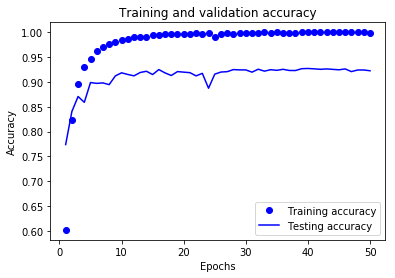

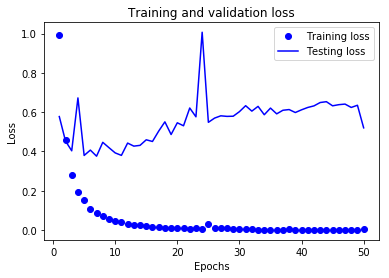

In [5]:
## Plot results
print(len(all_history))

average_acc = [np.mean([x["acc"][i] for x in all_history]) for i in range(50)]
average_loss = [np.mean([x["loss"][i] for x in all_history]) for i in range(50)]
average_val_acc = [np.mean([x["val_acc"][i] for x in all_history]) for i in range(50)]
average_val_loss = [np.mean([x["val_loss"][i] for x in all_history]) for i in range(50)]

plt.plot(range(1, len(average_acc) + 1), average_acc, 'bo', label = 'Training accuracy')
plt.plot(range(1, len(average_val_acc) + 1), average_val_acc, 'b', label = 'Testing accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/acc_history')

plt.figure()

plt.plot(range(1, len(average_loss) + 1), average_loss, 'bo', label = 'Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, 'b', label = 'Testing loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/loss_history')

plt.show()

In [14]:
# #for i in range(0,10):
# print(np.argmax(all_history[0]['val_acc']))
# print(np.argmin(all_history[0]['val_loss']))
# print(max(all_history[0]['val_acc']))
# print(min(all_history[0]['val_loss']))
print(np.argmin(average_val_loss))
print(np.argmax(average_val_acc))

6
39


In [15]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

def evaluate_model(k, confusion_matrices):

    train, validation, test = split_data(subjects_data=subjects_data, foldIteration=k, test_sub=None)
    validation_images = validation["images"]; validation_labels = validation["labels"]

    # Load best model from checkpoint of current fold
    model = load_model('/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/modelsSEIs/model{}.hdf5'.format(k))
    
    # Check validation accuracy
    results = model.evaluate(validation_images, validation_labels)
    print(results)

    predictions = model.predict(validation_images)
    conf_mat = confusion_matrix(np.argmax(validation_labels, axis=1), np.argmax(predictions, axis=1))
    confusion_matrices.append(conf_mat)

In [16]:
confusion_matrices = Manager().list()

for k in range(1,11):    
    # Load best models of each fold and compute confusion matrices
    p = Process(target=evaluate_model, args=(k, confusion_matrices))
    p.start()
    p.join()

# Convert manager list back to normal list
conf_matrices = [item for item in confusion_matrices]

# Store list with confusion matrices from every fold
with open("/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/confusion_matrices", 'wb') as f:
    pickle.dump(conf_matrices,f)

['sub1', 's1', 's2', 's3']
Test set is empty
Total samples:  6241
5424
817
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
817/817 [==============================] - 8s 10ms/sample - loss: 0.0514 - acc: 0.9829
[0.0513546209448485, 0.98286414]
['sub2', 's3', 's4', 's5']
Test set is empty
Total samples:  6241
5466
775
0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
775/775 [=========

In [4]:
with open("/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/confusion_matrices", 'rb') as f:
    confusion_matrices = pickle.load(f)

[[8.69358007e-01 7.13725583e-02 8.29568963e-03 0.00000000e+00
  5.09737447e-02]
 [7.83538891e-02 8.79009692e-01 2.72584895e-02 1.19485714e-02
  3.42935785e-03]
 [0.00000000e+00 1.34181648e-02 9.80923780e-01 4.97778308e-03
  6.80272109e-04]
 [0.00000000e+00 0.00000000e+00 3.30308602e-02 9.66969140e-01
  0.00000000e+00]
 [4.32544934e-02 1.02564103e-03 0.00000000e+00 0.00000000e+00
  9.55719866e-01]]
0.9303960969946271


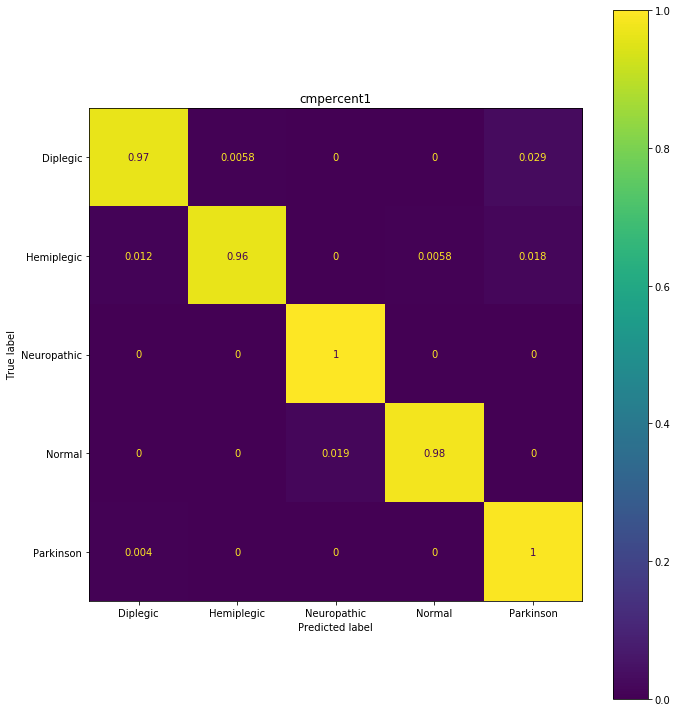

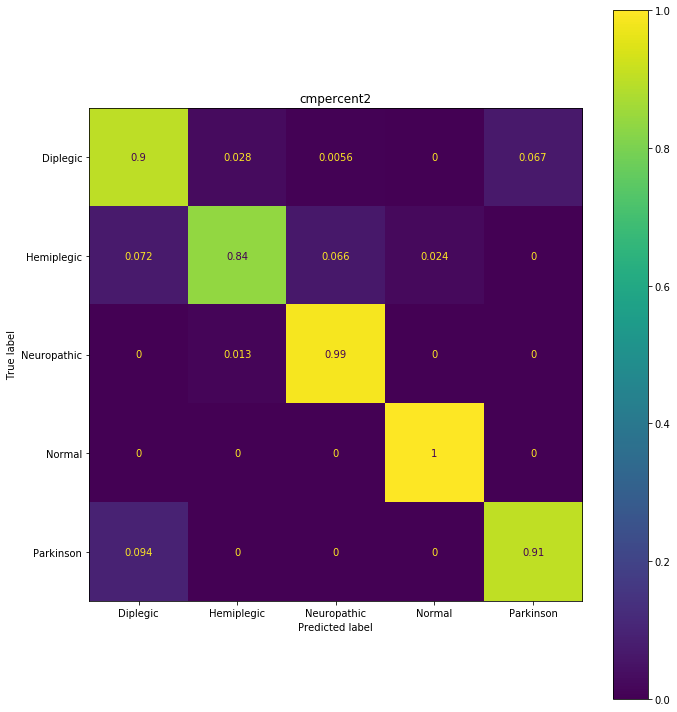

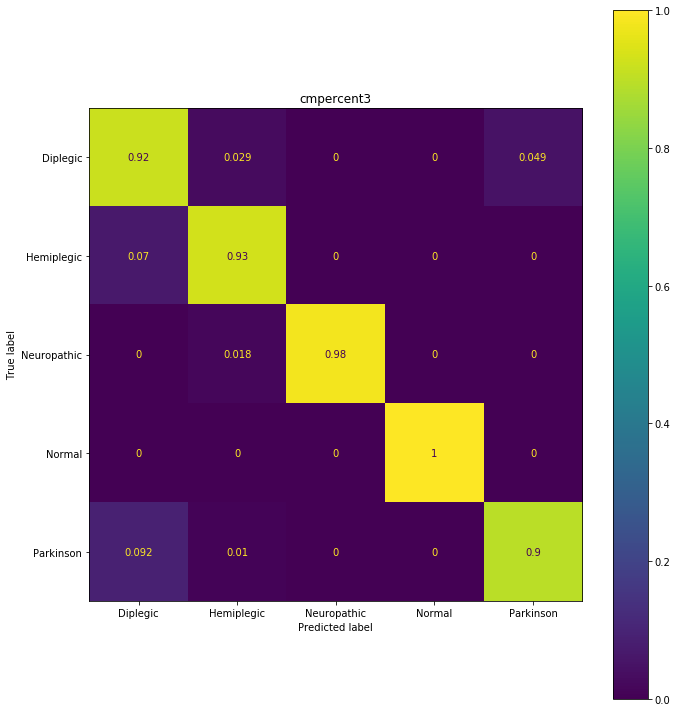

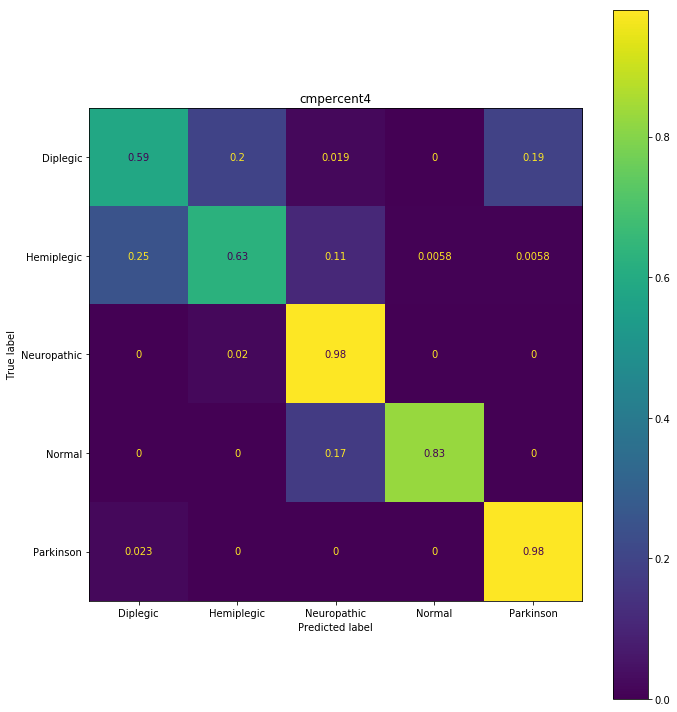

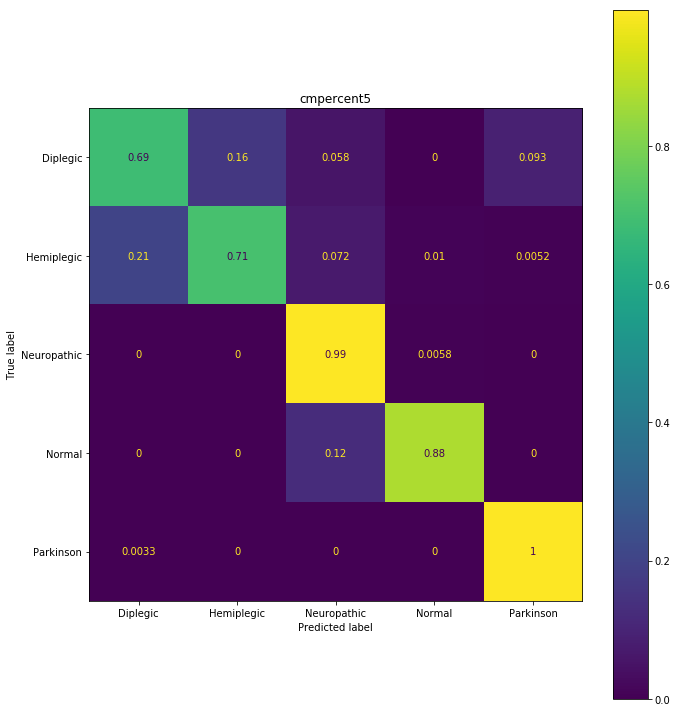

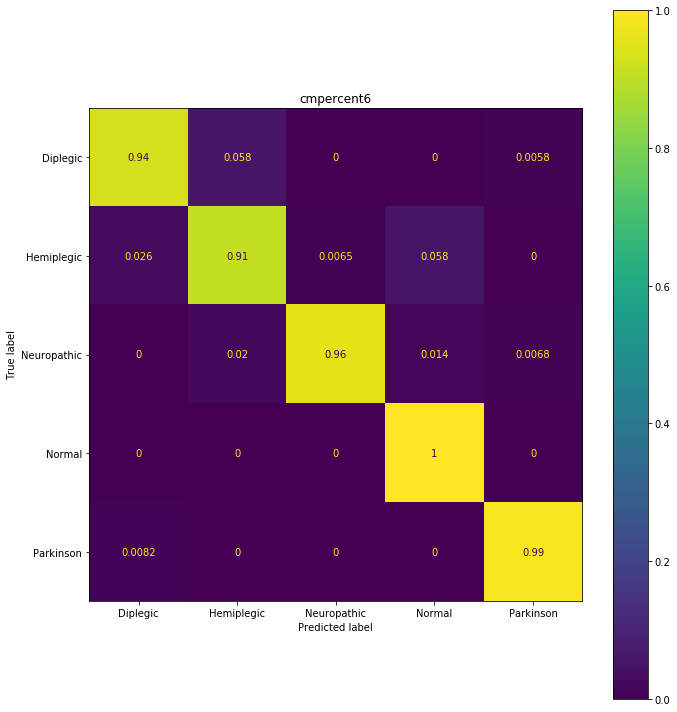

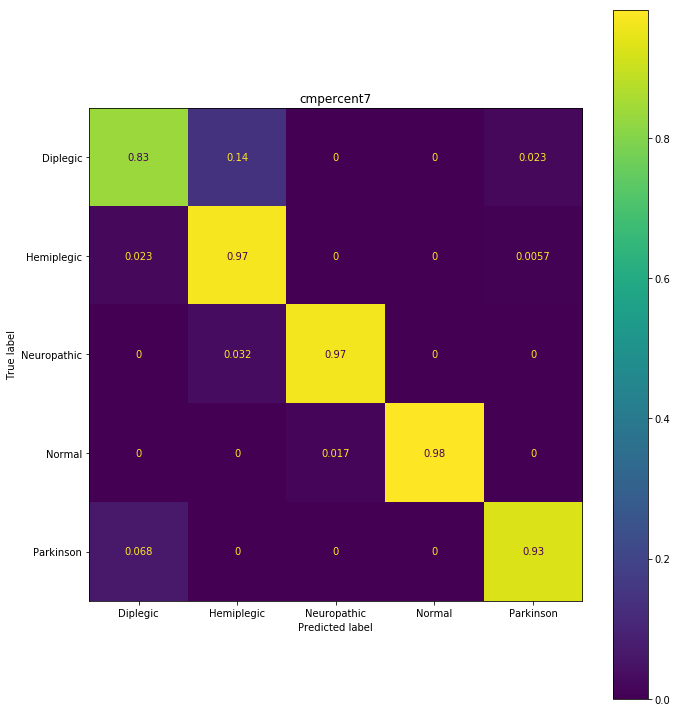

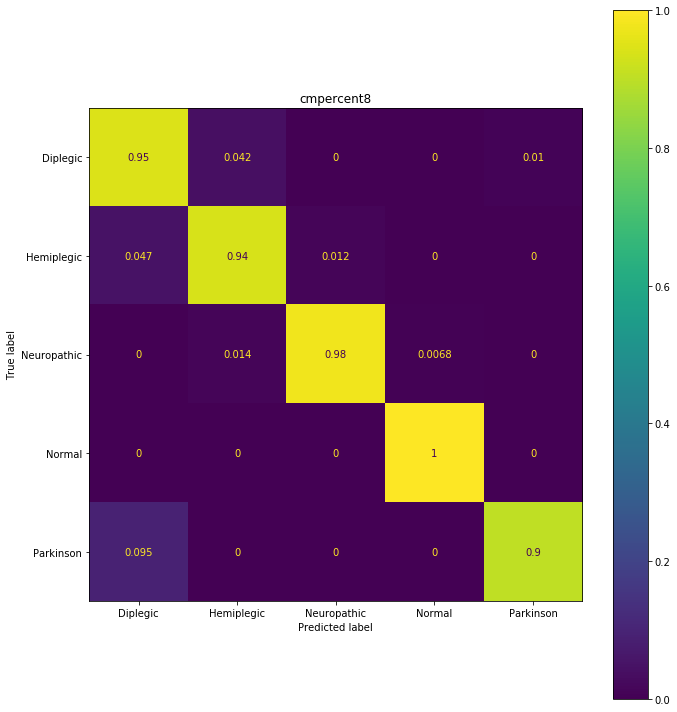

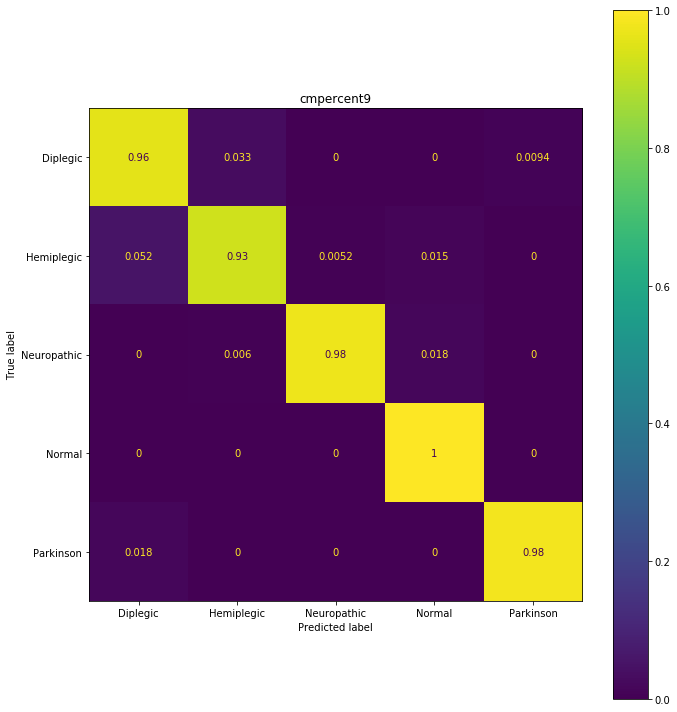

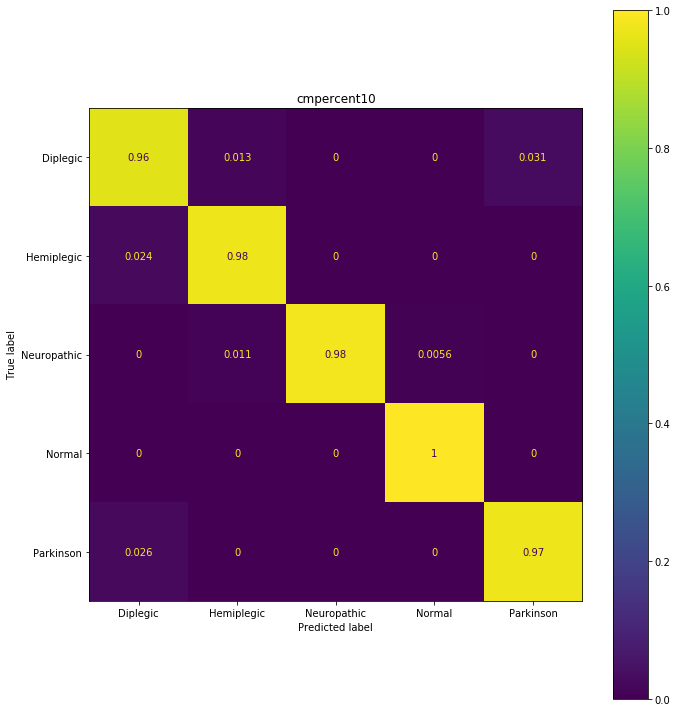

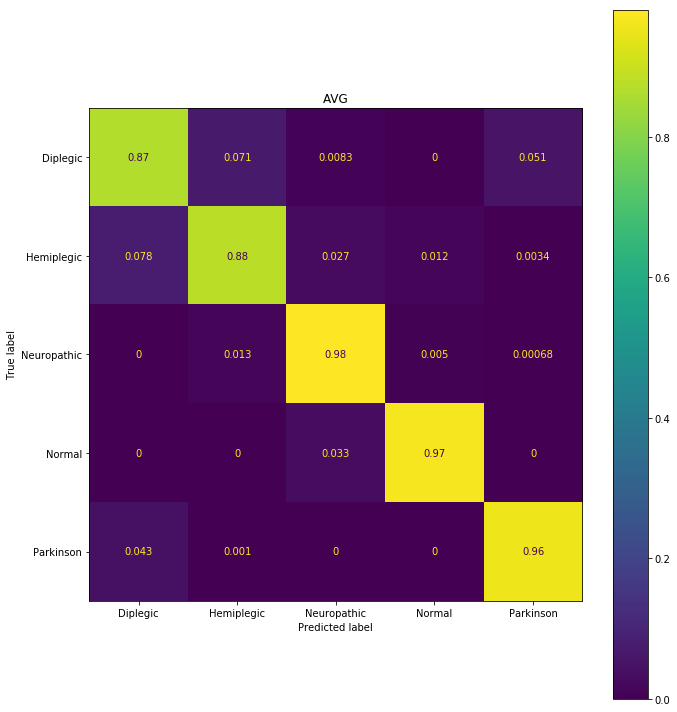

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to display confusion matrices
def DisplayCM(CM, title, save):

    display_labels = ['Diplegic', 'Hemiplegic', 'Neuropathic', 'Normal', 'Parkinson']
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                                display_labels=display_labels)
    disp = disp.plot(include_values=True,
                    cmap='viridis', ax=ax, xticks_rotation='horizontal')
    plt.title(title)
    plt.tight_layout()

    #if save: plt.savefig('/home/pfa/Documents/Code/VGG19/Train_GAIT_IT_IST/dataSEIs/Confusion Matrices/' + title)


# Initialize normalized and average CMs and normalized CMs list
cmAVG = np.zeros((5,5))
cmpercent = np.zeros((5,5))
cmpercentList = []

i = 1
# Create list for eachconfusion matrix in percentages
for cm in confusion_matrices:
    display_labels = ['Diplegic', 'Hemiplegic', 'Neuropathic', 'Normal', 'Parkinson']

    cmpercent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmpercentList.append(cmpercent)

   # Plot average CM of current model
    DisplayCM(CM=cmpercent, title='cmpercent{}'.format(i), save=True)
    i += 1


for i in range(0,5):
    for j in range(0,5):
        cmAVG[i][j] = np.mean([x[i][j] for x in cmpercentList])

# Plot average CM of current model
DisplayCM(CM=cmAVG, title='AVG', save=True)

print(cmAVG)
print(np.mean([cmAVG[0][0],cmAVG[1][1], cmAVG[2][2], cmAVG[3][3], cmAVG[4][4]]))